# <font color='red'>Categorical data</font>
1. Nominal data - names
1. Ordinal data - ordered
1. Continuous values

##### Why cateogorical data?
* save memory for repeated values
* sorting ordinal data (lexical order might be wrong)
* continuous values => discrete values

##### Packages Installation

In [1]:
!pip install pandas
!pip install seaborn

##### Conversion

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

animals = pd.Series(['cat', 'dog', 'duck', 'cat', 'cat', 'bird', 'cat', 'dog'])
animals

# animals.unique()
# pd.unique(animals)

# animals.value_counts()
# pd.value_counts(animals)


0     cat
1     dog
2    duck
3     cat
4     cat
5    bird
6     cat
7     dog
dtype: object

In [7]:
df = pd.DataFrame({'animals':animals})
df.animals 
# df.animals.hist()

ser = df.animals.astype('category') # Cast a pandas object to a specified dtype
type(ser.values) # categorical
ser.values

# ser.values.categories # Index (ordered, sliceable)
# ser.values.categories[:2]
# ser.values.codes # array of integers which are the positions of the actual values in the categories array, dtype=int8

# change code list to values
# ser.values.categories.take([0,1,0,1])
# ser.values.categories.take(ser.values.codes) 


Index(['bird', 'cat', 'dog', 'duck'], dtype='object')

In [4]:
# specifing dtype

# animals = pd.Series(['cat', 'dog', 'duck', 'cat', 'cat', 'bird', 'cat', 'dog'], dtype="category") # dtype=category
# animals.values # values is categories

# df = pd.DataFrame({'animals':animals}) 
# df.animals.values # category


##### Creation

In [5]:
categoryList = ['child', 'adult', 'elderly']
# categoryIntList = [1,2,3] # cateogry data type could be integer, float, etc., but less meaningful

# method 1
# ageGroup = pd.Categorical(categoryList)
# ageGroup

# ageCodes = [0,1,2,0,1,2,0,0,1,1,2]
# ageGroup.take(ageCodes)

# method 2

# ageGroup2 = pd.Categorical.from_codes(ageCodes, categoryList)
# ageGroup2 # same categorical data

# ageGroupOrder = pd.Categorical.from_codes(ageCodes, categoryList, ordered=True)
# ageGroupOrder


#### <font color='blue'>1) Column to Nominal Data</font>

In [6]:
url = 'https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/tips.csv'
tips = pd.read_csv(url)   # tips dataset

# tips.info()
# tips.total_bill.describe() # min 3.07, max 50.81

# Column to nominal
byteBeforeConvert = tips.time.memory_usage()
tips['time'] = tips['time'].astype('category') # time: Dinner, Lunch
byteAfterConvert = tips.time.memory_usage()

print(f'Memory: {byteBeforeConvert} -> {byteAfterConvert} bytes, {byteAfterConvert/byteBeforeConvert*100:.2f}% of original size')


Memory: 2080 -> 468 bytes, 22.50% of original size


#### <font color='blue'>2) Column to Ordinal Data</font>

In [7]:
# Column to ordinal
# tips['day'].unique()

byteBeforeConvert = tips.day.memory_usage()
dayCatType = pd.api.types.CategoricalDtype(categories = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'], ordered=True)
tips['day'] = tips['day'].astype(dayCatType) 
byteAfterConvert = tips.day.memory_usage()

print(f'Memory: {byteBeforeConvert} -> {byteAfterConvert} bytes, {byteAfterConvert/byteBeforeConvert*100:.2f}% of original size')

# tips.info()
# tips.day.cat.categories
# tips.day.cat.codes
tips.day.cat.remove_unused_categories(inplace=True) # remove unused category item
# tips.day.cat.categories


Memory: 2080 -> 748 bytes, 35.96% of original size


##### Categorical methods (cat methods)

In [8]:
animals = pd.Series(['cat', 'dog', 'duck', 'cat', 'cat', 'bird', 'cat', 'dog'], dtype="category") # dtype=category
# animals.values # values is categories
# animals.values.categories

# animals.cat
# animals.cat.add_categories(['horse', 'tiger', 'zebra', 'lion'], inplace=True) # add categories to animal
# animals.cat.remove_categories(['cat'], inplace=True) # remove categories, if this is in use, set to NaN

# animals.cat.as_ordered(inplace=True) # ordered
# animals.cat.reorder_categories(['lion', 'tiger', 'horse', 'zebra', 'dog', 'bird', 'duck'], inplace=True) # change order
# animals.cat.as_unordered(inplace=True) # unordered

# animals.cat.remove_unused_categories(inplace=True) # remove unused

# animals


#### <font color='blue'>3) Continous value to Ordinal Data</font>

In [9]:
url = 'https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/tips.csv'
tips = pd.read_csv(url)   # tips dataset

labels = ['cheap','normal','expensive']
# bins = pd.cut(tips.total_bill, 3) # Bin values into discrete intervals
bins = pd.cut(tips.total_bill, 3, labels=labels) # Bin values into discrete intervals
# bins = pd.cut(tips.total_bill, bins=[0,10,20,30]) # custom bin cut position
# pd.qcut() => Discretize variable into equal-sized buckets based, check => bins.values.describe()

# type(bins) # series

# type(tips.total_bill.values) # before
# type(bins.values) # after: categorical

# bins.values.codes
# bins.values.categories
# bins.cat.codes
# bins.cat.categories

# bins.values.describe() # not work with bins.cat
# bins.values.value_counts() # not work with bins.cat
# tips.total_bill.groupby(bins).agg(['count','min','max'])

##### Query

In [10]:
mask = bins.values.isin(['expensive','cheap']) # expensive bills
mask
# tips[mask]

# bins is a series
# tips[bins.values == 'expensive']
# tips[bins.values > 'normal']

# sorting
# bins.sort_values(ascending=True)
#tips.sort_values(by=['day','time'], ascending=[True, True])
tips.sort_values(by=['day'], ascending=[True])

# tips.total_bill[bins.values == 'cheap'].plot.hist()

,total_bill,tip,sex,smoker,day,time,size
96,27.28,4.00,Male,Yes,Fri,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2
98,21.01,3.00,Male,Yes,Fri,Dinner,2
97,12.03,1.50,Male,Yes,Fri,Dinner,2
95,40.17,4.73,Male,Yes,Fri,Dinner,4
...,...,...,...,...,...,...,...
132,11.17,1.50,Female,No,Thur,Lunch,2
131,20.27,2.83,Female,No,Thur,Lunch,2
130,19.08,1.50,Male,No,Thur,Lunch,2
128,11.38,2.00,Female,No,Thur,Lunch,2


##### Plot with categorical data
* https://seaborn.pydata.org/tutorial/categorical.html

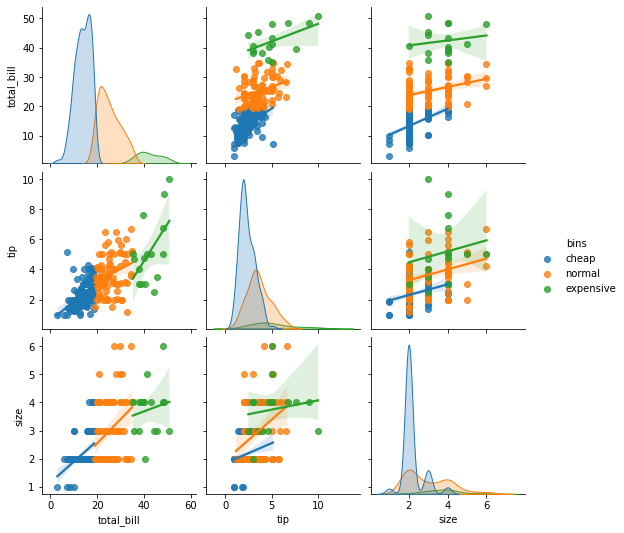

In [11]:
# Using matplotlib

# plot the histogram
# tips.total_bill.plot.hist(bins=5) #bins: number of histogram bins to be used
# bins.hist()
# bins.value_counts().plot(kind='bar')
# bins.value_counts().plot(kind='barh') # horizontal

# tips.plot.scatter(x='total_bill', y='tip')
# tips.plot.scatter(y='total_bill', x='tip')


# Using seaborn
tips['bins'] = bins # add a new column

# count plot
# sns.countplot(x='day', data=tips)
# sns.countplot(x='day', hue='size', data=tips)


# cat plot
# sns.catplot(x='day', y='total_bill', data=tips)
# sns.catplot(x='day', y='total_bill', hue="sex", data=tips)
# sns.catplot(x='bins', y='tip', hue="sex", data=tips)

# bar plot
# sns.catplot(x='bins', y='tip', hue='day', kind='bar', data=tips) 

# box plot
# sns.catplot(x='bins', y='tip', hue='sex', kind='box', data=tips) 

# regression plot
# sns.regplot(x='total_bill', y='tip', data=tips)

# pairplot
# sns.pairplot(tips, vars=['total_bill', 'tip'])
# sns.pairplot(tips)
sns.pairplot(tips, kind='reg', hue='bins')

# sns.pairplot?